# Exploring Interface Losses in Bent Waveguides and Transmission in Edge Couplers
MIT 6.S976: Silicon Photonics HW2. Written by Shoumik Chowdhury (@shoumikdc)

In [1]:
# Import Relevant Packages
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Useful Constants (we use μm as the base unit here)
μm = 1; cm = 1e4; nm = 1e-3; π = np.pi

## 1. Meandering Waveguide: Problem Setup
We wish to solve $B = 2\pi N R L + 40N\log_{10}(\mathcal{O}_R^{-1})$ for each value of $R$. Here, the first term gives the propagation loss in a meandering waveguide structure with $N$ bends, while the second term gives the interface loss. By solving for $N$ given a loss budget $B$, we can find the maximum number of meanders.

In [113]:
# Mode overlaps calculated in lumerical for each radius
R = [2.7, 5, 7.5, 10] # μm
Oᵣ = [0.995143, 0.998619, 0.99939, 0.999657]

# Loss Budget = 3dB (i.e. 50%)
B = 3

# Propagation Loss in Bends
losses = [1, 3] # dB/cm

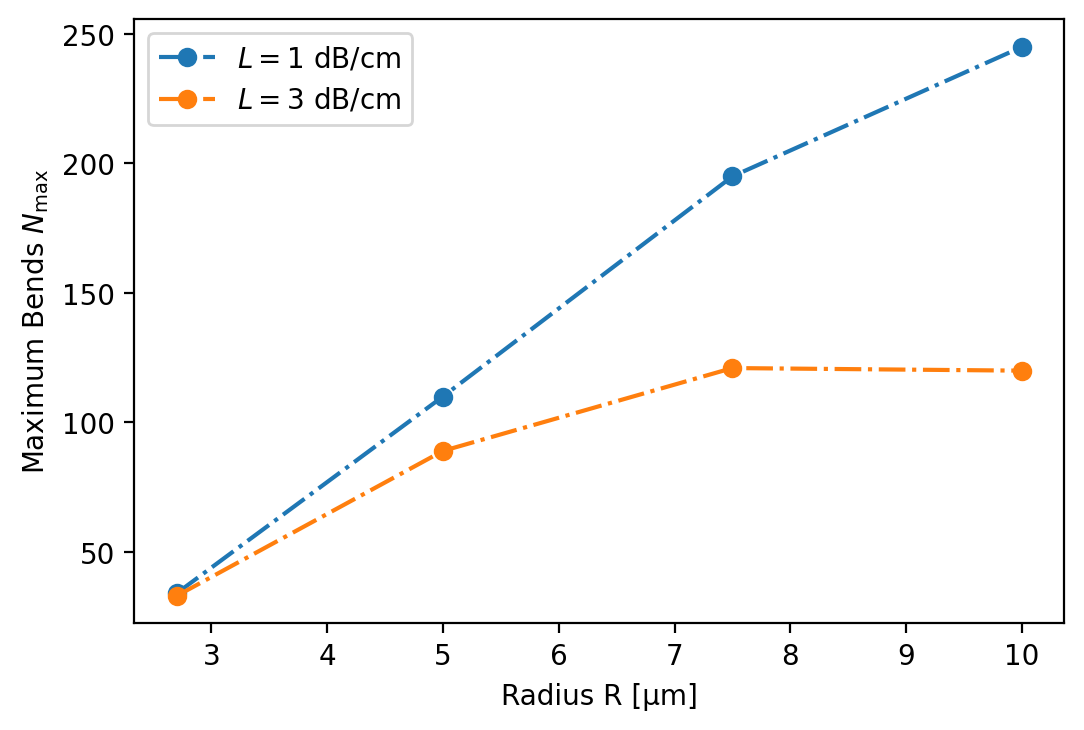

In [114]:
fig, ax = plt.subplots(dpi=200)

for L in losses:
    N_max_list = []
    for idx, radius in enumerate(R):
        r_in_cm = radius / cm
        N_max = B // (2*π*r_in_cm*L + 40*np.log10(1 / Oᵣ[idx]))
        N_max_list.append(N_max)
    
    ax.plot(R, N_max_list, 'o-.', label=fr"$L = {L}$ dB/cm")

ax.set_xlabel("Radius R [μm]")
ax.set_ylabel(r"Maximum Bends $N_{\rm max}$")
ax.legend()

## 2. FDTD Simulations of Waveguide Bends

In [75]:
# Export plot data from Matlab file
f = h5py.File('FDTD_plot.mat','r')
f.keys()

<KeysViewHDF5 ['lum']>

In [76]:
λ = np.array(f['lum']['x0']) * 1e6 # Convert wavelengths to μm
S21_TE0 = np.array(f['lum']['y0'])
S21_TE1 = np.array(f['lum']['y1'])

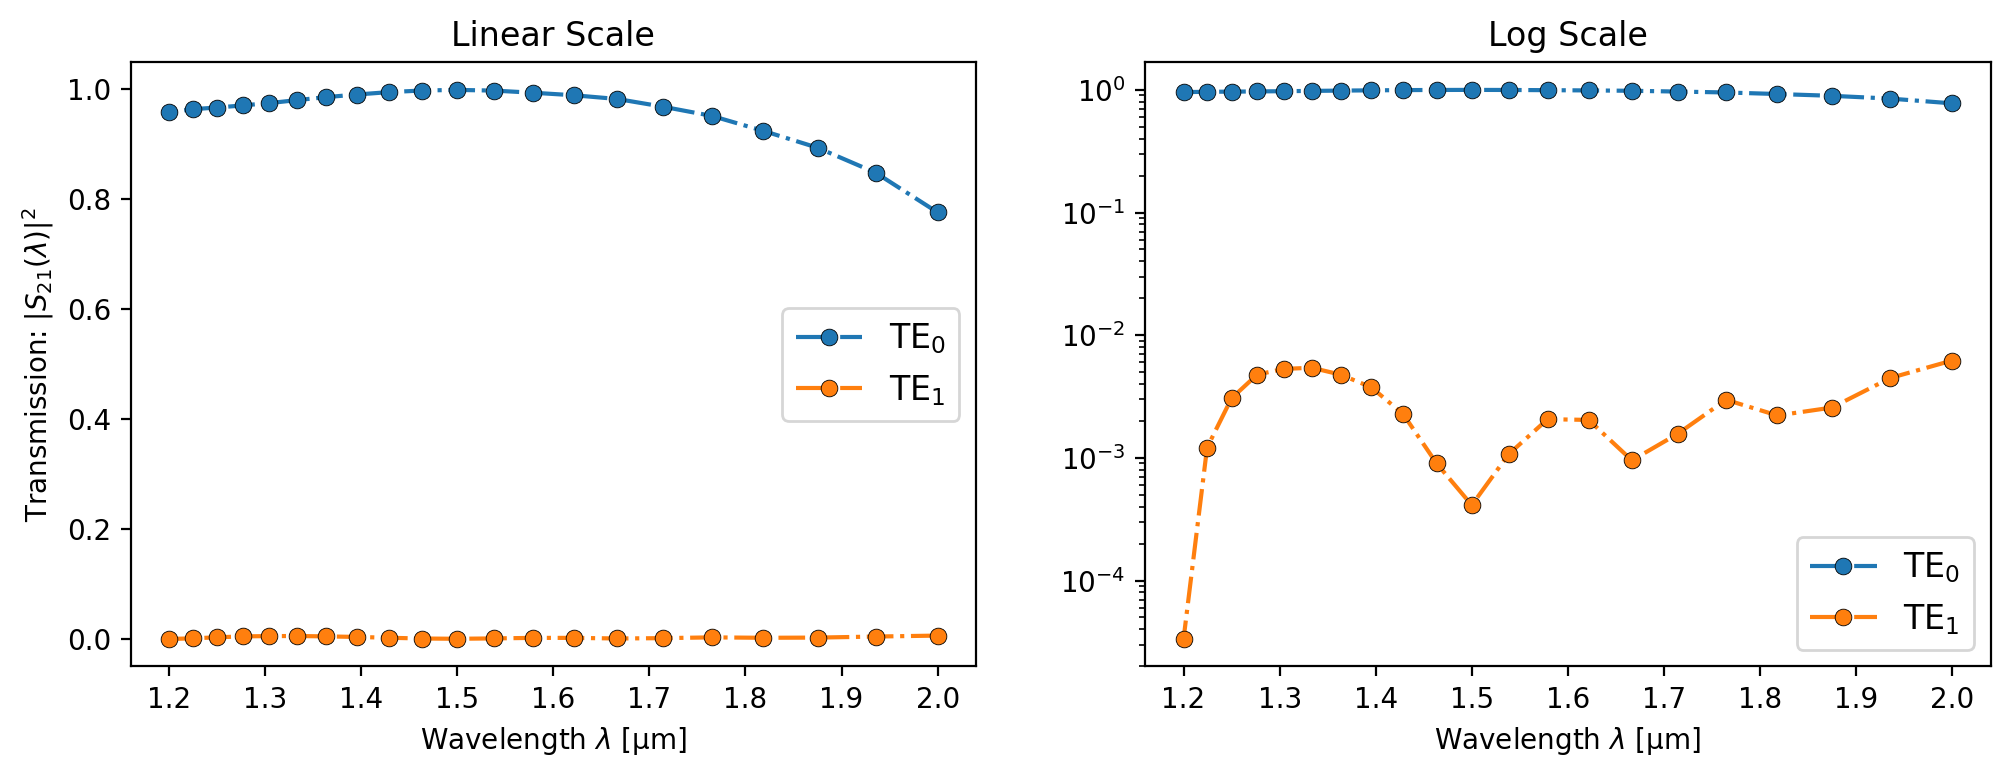

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), dpi=200)

linestyle = "o-."
mec = "black"
mew = 0.3

# Plot data on linear scale
ax[0].plot(λ, S21_TE0, linestyle, markeredgecolor=mec, markeredgewidth=mew, label=r"TE$_0$")
ax[0].plot(λ, S21_TE1, linestyle, markeredgecolor=mec, markeredgewidth=mew, label=r"TE$_1$")
ax[0].set_title("Linear Scale")
ax[0].set_ylabel(r"Transmission: $|S_{21}(\lambda)|^2$")
ax[0].set_xlabel(r"Wavelength $\lambda$ [μm]")

# Plot data on log scale
ax[1].semilogy(λ, S21_TE0, linestyle, markeredgecolor=mec, markeredgewidth=mew, label=r"TE$_0$")
ax[1].semilogy(λ, S21_TE1, linestyle, markeredgecolor=mec, markeredgewidth=mew, label=r"TE$_1$")
ax[1].set_title("Log Scale")
ax[1].set_xlabel(r"Wavelength $\lambda$ [μm]")

ax[0].legend(fontsize='12')
ax[1].legend(fontsize='12')


## 3. Misalignment in an Edge Coupler

Text(0, 0.5, "Mode Overlap $\\Gamma'$")

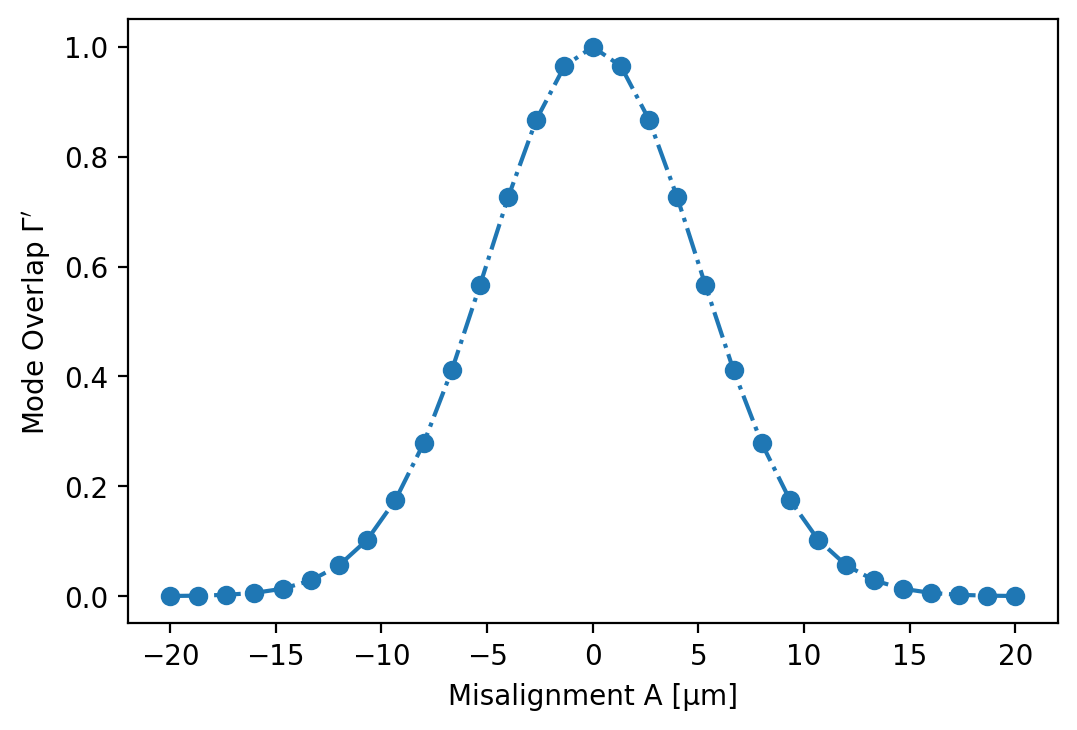

In [108]:
A = np.linspace(-20, 20, 31)

def gaussian(x, var):
    return np.exp(-x**2 / var)

fig, ax = plt.subplots(dpi=200)
ax.plot(A, gaussian(A, 50), 'o-.')
ax.set_xlabel("Misalignment A [μm]")
ax.set_ylabel(r"Mode Overlap $\Gamma'$")

## 4. Mode Overlaps with a Gaussian Beam

In [157]:
MO_data_TE = h5py.File('MO_data_TE.mat','r')
MO_data_TM = h5py.File('MO_data_TM.mat','r')

widths = np.array(MO_data_TE['widths'][0]) * 1e9 # Convert to nm
MO_TE = np.array(MO_data_TE['MO'])
MO_TM = np.array(MO_data_TM['MO'])

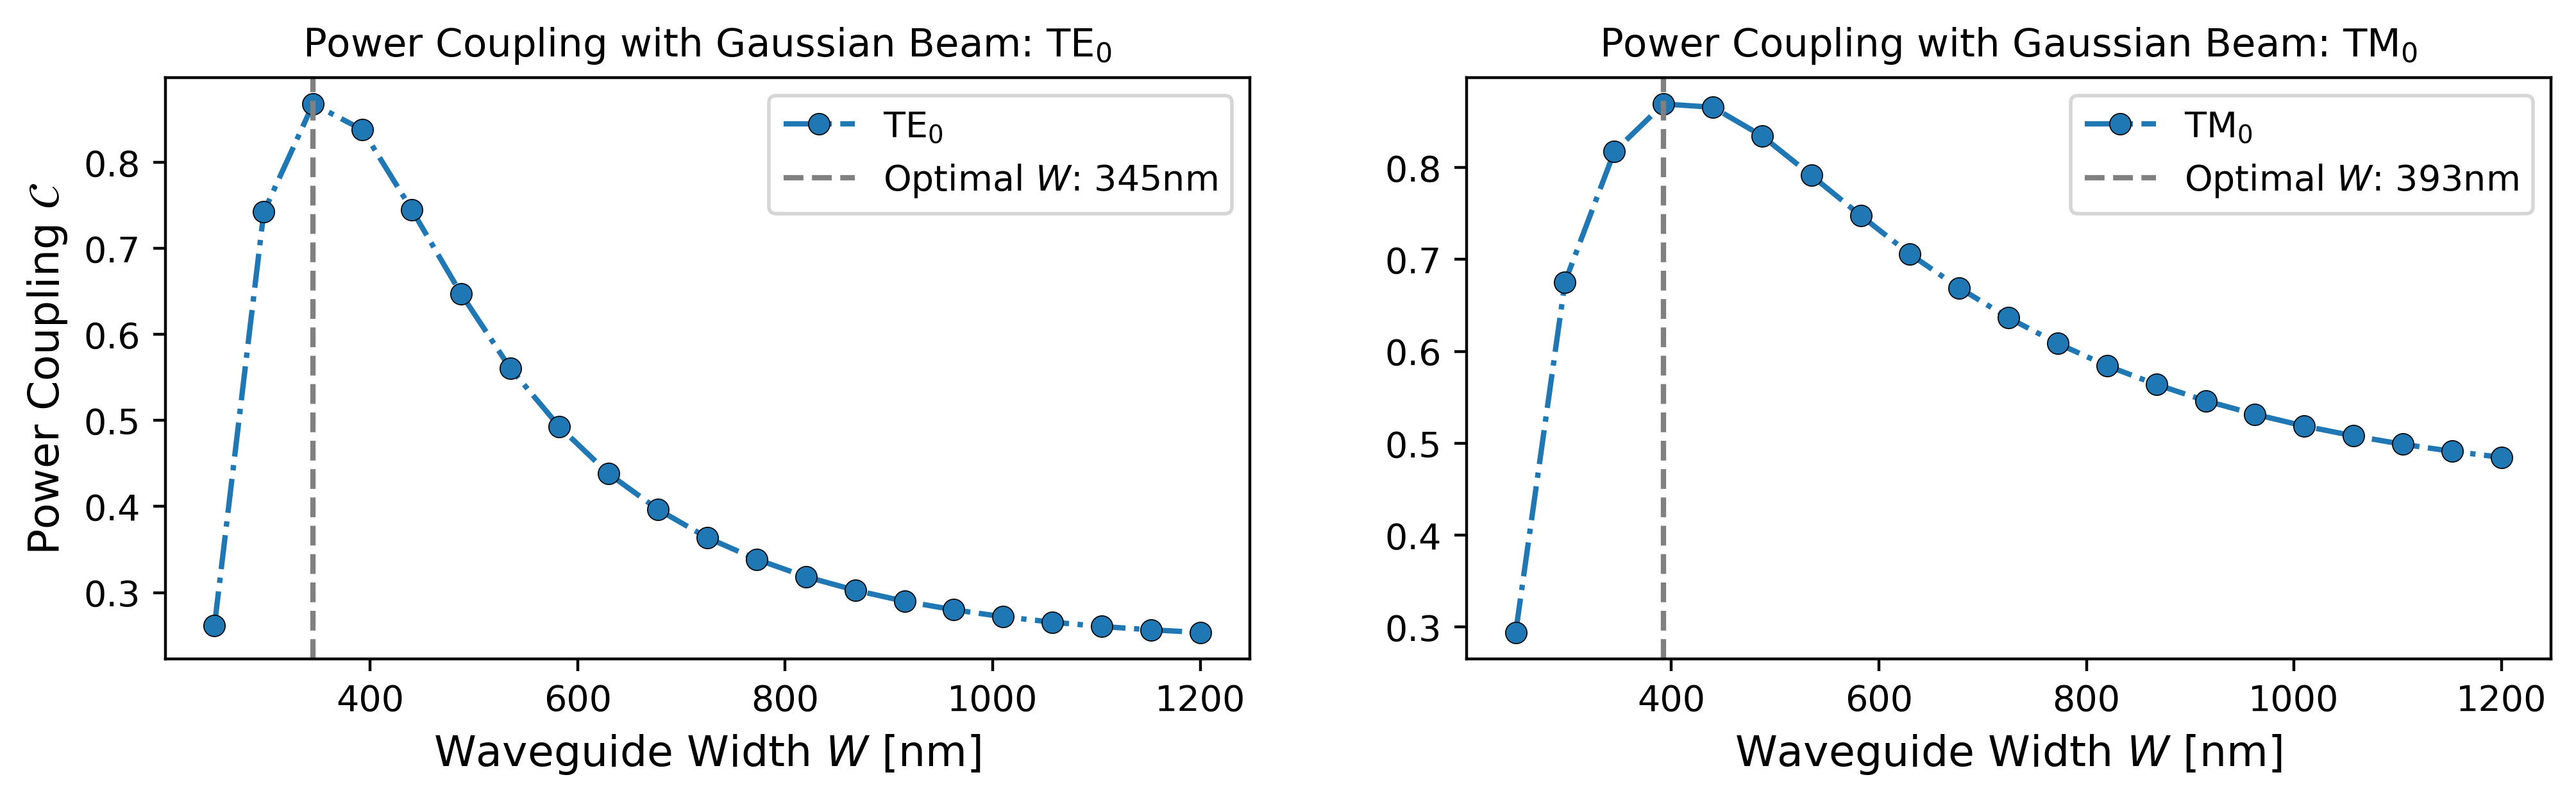

In [172]:
fig, ax = plt.subplots(1, 2, figsize = (12, 3), dpi=400)

ax[0].plot(widths, MO_TE[:, 1], linestyle, markeredgecolor=mec, markeredgewidth=mew, label=r"TE$_0$")
ax[0].set_title(r"Power Coupling with Gaussian Beam: TE$_0$", fontsize=11)
ax[0].set_ylabel(r"Power Coupling $\mathcal{C}$", fontsize=12)
ax[0].set_xlabel(r"Waveguide Width $W$ [nm]", fontsize=12)
ax[0].axvline(widths[2], linestyle="--", c="grey", label=fr"Optimal $W$: {round(widths[2])}nm")


ax[1].plot(widths, MO_TM[:, 1], linestyle, markeredgecolor=mec, markeredgewidth=mew, label=r"TM$_0$")
ax[1].set_title(r"Power Coupling with Gaussian Beam: TM$_0$", fontsize=11)
ax[1].set_xlabel(r"Waveguide Width $W$ [nm]", fontsize=12)
ax[1].axvline(widths[3], linestyle="--", c="grey", label=fr"Optimal $W$: {round(widths[3])}nm")

ax[0].legend()
ax[1].legend()